In [117]:
# PROJECT TITLE: Global Startup Funding Unicorn Analysis
# PRESENTED BY : CHITTILLA_Venkata Somanath
# COURSE: Python programming for Business Analytics
# DESCRIPTION: An end-to-end analysis of Global Unicorn Companies (2018–2021)

In [118]:
#RESEARCH OBJECTIVES:
#1. Analyze the growth trend of 'Unicorn' status (valuation > $1B) from 2018 to 2021.
#2. Identify geographical and industrial leaders in the startup ecosystem.
#3. Track how average valuations have evolved over time.
#4. Categorize companies into estimated funding stages based on their market value.


In [119]:
#DATASET JUSTIFICATION:
#Contains over 1,000 global records.
#Includes quantitative (Valuation), qualitative (Industry, Country), and temporal (Date) data.
#Sourced from a live CSV hosted on my GitHub for reproducibility.


In [120]:
# 2. ENVIRONMENT SETUP
# I am importing the essential stack:
# Pandas for data manipulation, Matplotlib/Seaborn for static plots,
# and Plotly for interactive exploration.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Suppressing warnings for a cleaner output and setting visual aesthetics.
# ensures all charts look consistent.
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [121]:
#3. DATA ACQUISITION
# Instead of local uploads, I am reading the dataset directly from my GitHub repository to ensure the project can be run by anyone instantly.
data_url = "https://raw.githubusercontent.com/Venkatasomanath/csv-file-datascience-for-python/main/unicorn_companies.csv"
df = pd.read_csv(data_url)

print("--- DATA LOADED SUCCESSFULLY ---")

--- DATA LOADED SUCCESSFULLY ---


In [122]:
#4. INITIAL DATA EXPLORATION
# Here, I examine the structural integrity of the data.
# Checking shape, column types, and summary statistics to identify
# cleaning requirements (e.g., typos or formatting issues).
print(f"\nDataset Dimensions: {df.shape}")
print("\nColumn Overview:")
print(df.columns)

print("\nData Types & Null Count:")
df.info()

print("\nNumerical Summary Statistics:")
print(df.describe())


Dataset Dimensions: (1037, 13)

Column Overview:
Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

Data Types & Null Count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object

In [123]:
#5. DATA CLEANING & PREPROCESSING
# Real-world data is often messy. In this block, I perform:
# 1. Column Renaming: Fixing a typo in the original dataset 'Select Inverstors'.
# 2. Type Conversion: Stripping '$' and ',' from Valuation to convert it to a float.
# 3. Date Parsing: Converting the string date into a Datetime object to extract 'Year'.
# 4. Imputation: Filling missing numeric values with the median and text with 'Unknown'.
# 5. Filtering: Narrowing the focus to the specific research period (2018-2021).

# Renaming the misspelled column
df.rename(columns={'Select Inverstors': 'Investors'}, inplace=True)

# Formatting the Valuation column for mathematical operations
df['Valuation ($B)'] = (
    df['Valuation ($B)']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Extracting temporal data
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')
df['Year'] = df['Date Joined'].dt.year

# Data Imputation (Handling missing values)
df['Valuation ($B)'] = df['Valuation ($B)'].fillna(df['Valuation ($B)'].median())
for col in ['Country', 'Industry', 'Investors']:
    df[col] = df[col].fillna('Unknown')

# Subsetting the data for 2018-2021
df = df[(df['Year'] >= 2018) & (df['Year'] <= 2021)].reset_index(drop=True)

print("\nCleaning Complete. Remaining Null Values:")
print(df.isna().sum())



Cleaning Complete. Remaining Null Values:
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Investors            0
Founded Year        18
Total Raised         8
Financial Stage    296
Investors Count      0
Deal Terms          13
Portfolio Exits    296
Year                 0
dtype: int64


In [124]:
# 6. Funding Analysis
# 1. Funding_Round: Categorizing companies based on valuation brackets.
# We add 'include_lowest=True' to ensure values of 0 or the lowest bin are included.
df['Funding_Round'] = pd.cut(
    df['Valuation ($B)'],
    bins=[0, 1, 5, 10, 50, 100, 500, 2000],
    labels=['Seed/Angel', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Mega'],
    include_lowest=True
)

# 2. Top_Investor: Isolating the lead investor from the comma-separated list.
# We use .astype(str) to ensure no errors occur if there are unexpected non-string values.
df['Top_Investor'] = df['Investors'].astype(str).apply(
    lambda x: x.split(',')[0].strip() if x != 'Unknown' and x != 'nan' else 'Unknown'
)

print(df[['Company', 'Valuation ($B)', 'Funding_Round', 'Top_Investor']].head())

        Company  Valuation ($B) Funding_Round                  Top_Investor
0         Canva           40.00      Series C         Sequoia Capital China
1  Checkout.com           40.00      Series C       Tiger Global Management
2    Databricks           38.00      Series C           Andreessen Horowitz
3         Chime           25.00      Series C           Forerunner Ventures
4   J&T Express           20.00      Series C  Hillhouse Capital Management


In [125]:
# 7. QUANTITATIVE DATA ANALYSIS
# Aggregating the data to answer the core research questions.
# I calculate counts, averages, and correlations.
unicorns_per_year = df['Year'].value_counts().sort_index()
top_countries = df['Country'].value_counts().head(10)
top_industries = df['Industry'].value_counts().head(10)
avg_valuation_year = df.groupby('Year')['Valuation ($B)'].mean()
correlation_matrix = df[['Year', 'Valuation ($B)']].corr()
top_investors = df['Top_Investor'].value_counts().head(10)

print("\nCorrelation (Year vs Valuation):\n", correlation_matrix)


Correlation (Year vs Valuation):
                 Year  Valuation ($B)
Year            1.00           -0.32
Valuation ($B) -0.32            1.00


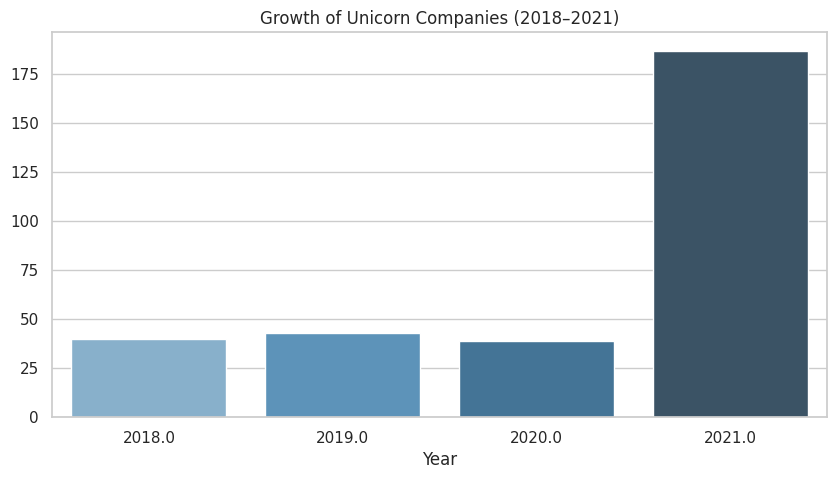

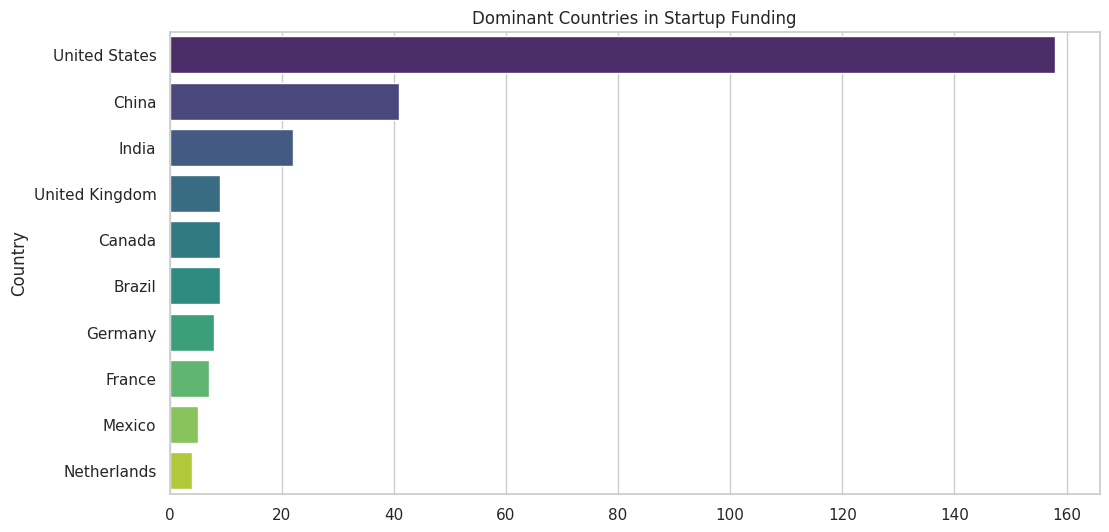

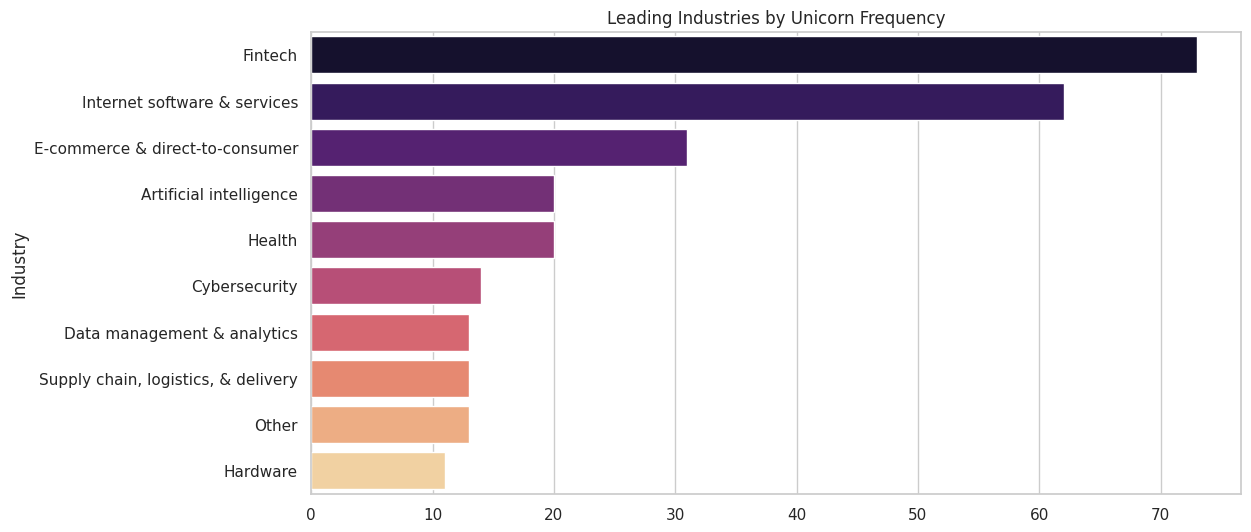

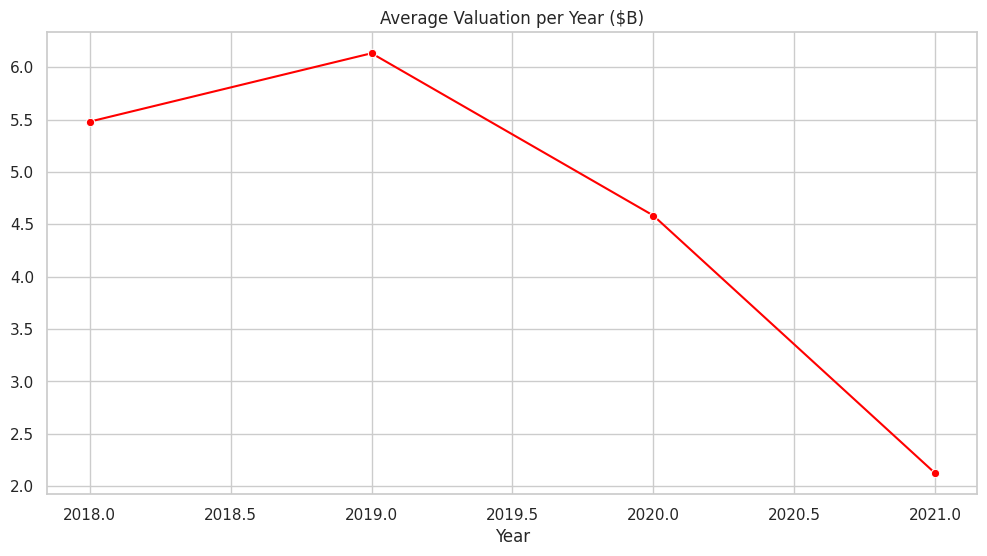

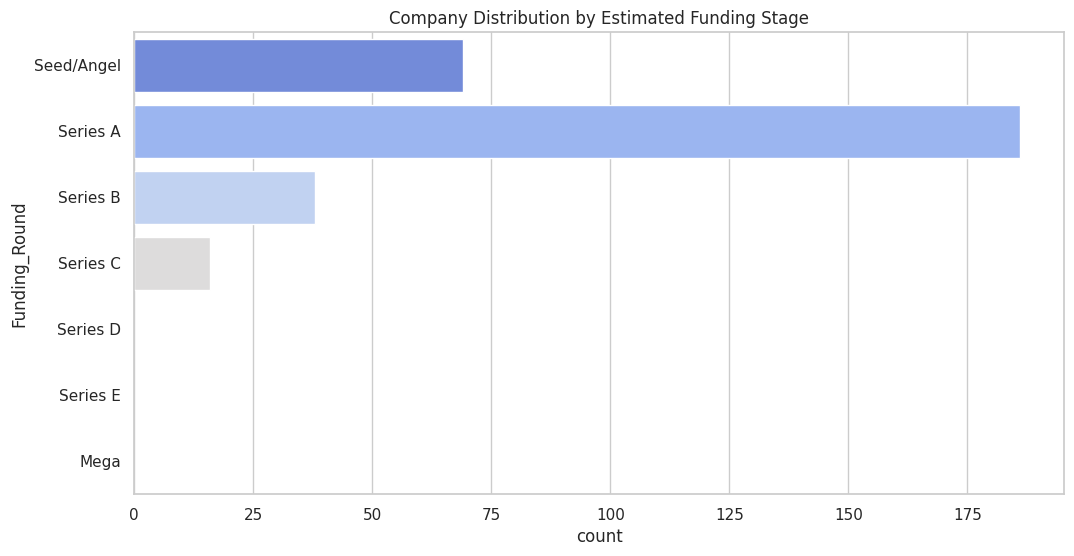

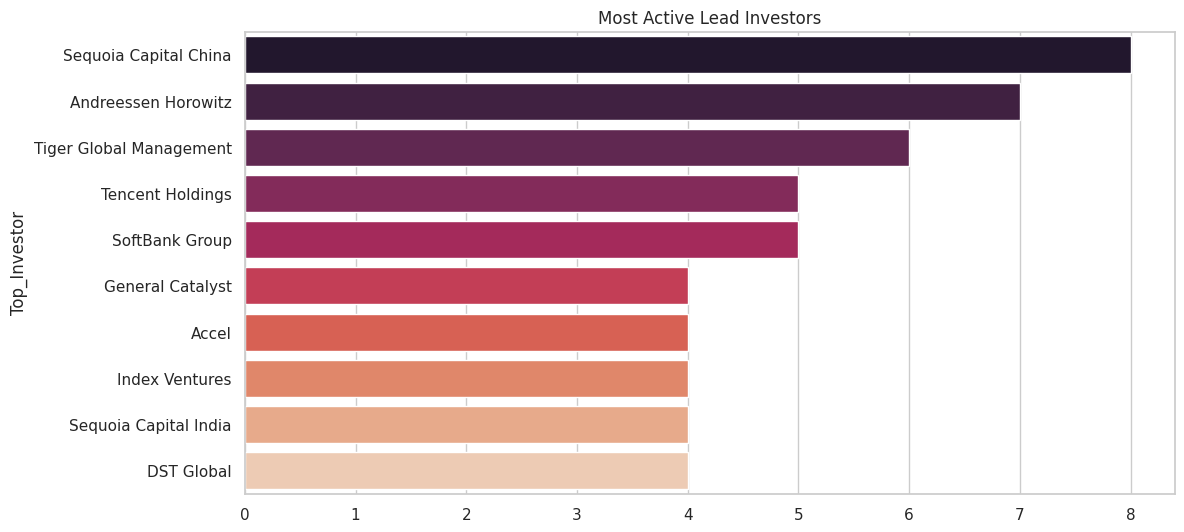

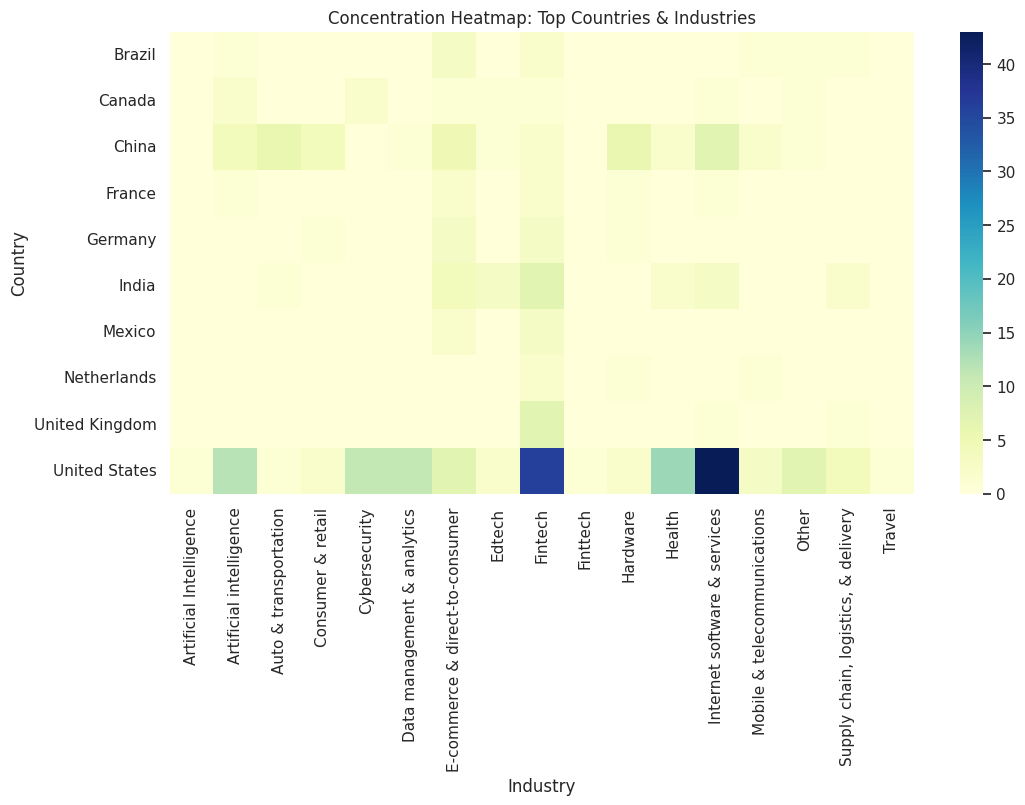

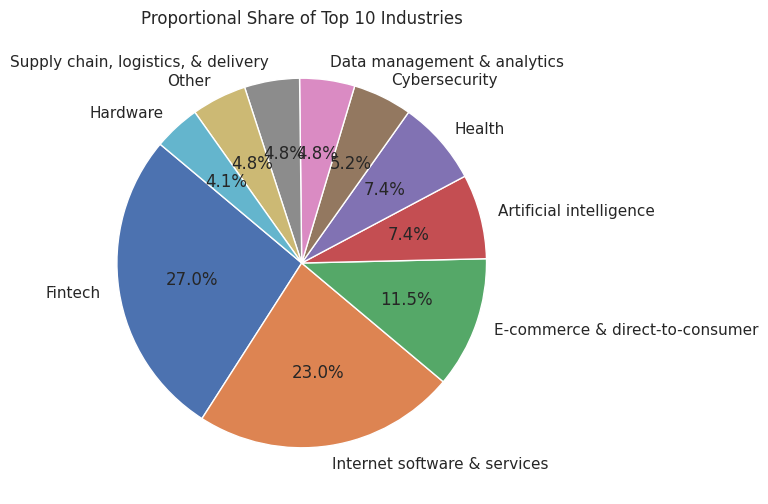

In [126]:
#8. DATA VISUALIZATION (9 INSIGHTS)
# Transforming numbers into visual presentations.
# Each plot addresses a specific research question.

# 8.1 Count of Unicorns per Year
plt.figure(figsize=(10,5))
sns.barplot(x=unicorns_per_year.index, y=unicorns_per_year.values, palette="Blues_d")
plt.title("Growth of Unicorn Companies (2018–2021)")
plt.show()

# 8.2 Top 10 Countries (Geographical Analysis)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Dominant Countries in Startup Funding")
plt.show()

# 8.3 Top 10 Industries (Sector Analysis)
sns.barplot(x=top_industries.values, y=top_industries.index, palette="magma")
plt.title("Leading Industries by Unicorn Frequency")
plt.show()

# 8.4 Valuation Trends Over Time
sns.lineplot(x=avg_valuation_year.index, y=avg_valuation_year.values, marker='o', color='red')
plt.title("Average Valuation per Year ($B)")
plt.show()

# 8.5 Estimated Funding Distribution
sns.countplot(y='Funding_Round', data=df, palette="coolwarm")
plt.title("Company Distribution by Estimated Funding Stage")
plt.show()

# 8.6 Top 10 Lead Investors
sns.barplot(x=top_investors.values, y=top_investors.index, palette="rocket")
plt.title("Most Active Lead Investors")
plt.show()

# 8.7 Interactive Year vs Valuation Exploration
fig = px.scatter(
    df, x='Year', y='Valuation ($B)', color='Country',
    size='Valuation ($B)', hover_data=['Company', 'Industry'],
    title="Interactive Exploration: Valuation vs. Entry Year"
)
fig.show()

# 8.8 Heatmap of Country vs Industry Concentrations
# This provides a 2D view of where specific industries flourish.
top_countries_list = df['Country'].value_counts().head(10).index
heatmap_subset = df[df['Country'].isin(top_countries_list)]
heatmap_data = pd.crosstab(heatmap_subset['Country'], heatmap_subset['Industry'])
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Concentration Heatmap: Top Countries & Industries")
plt.show()

# 8.9 Industry Market Share (Pie Chart)
plt.pie(top_industries.values, labels=top_industries.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportional Share of Top 10 Industries")
plt.show()

In [127]:
# 9. FINAL CONCLUSIONS & RECOMMENDATIONS
#1. GROWTH: There was a massive surge in unicorn creation between 2020 and 2021.
#2. GEOGRAPHY: The United States remains the primary hub, followed by China and India.
#3. SECTORS: Fintech and Internet Software are the undisputed leaders of the era.
#4. VALUATION: While entry-level unicorns are common, average valuation is rising.

#LIMITATIONS:
#Valuation brackets are estimates based on total company worth.
#The analysis concludes at 2021 data.

#RECOMMENDATIONS:
#Focus investment research on the intersection of Fintech and AI.
#Monitor the rapidly expanding Indian and UK startup ecosystems.

In [128]:
# 10. AI USAGE LOG
# ChatGPT: Used for debugging and visual representations

In [129]:
# Project submitted by: CHITTILLA_Venkata Somanath
# The dataset was curated and hosted on my personal GitHub repository.
# All analytical conclusions were derived from the resulting visualizations.